In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import polars as pl

In [3]:
works_topics = pl.read_parquet("../data/modelling/works_post_topics2.parquet")
topics_to_words = pl.read_csv("../data/modelling/topic_words2.csv")
works_topics = works_topics.with_columns(
    number_of_works = pl.lit(1)
)
cols = [f"cited_by_count_{i}" for i in range(2012, 2025)]
cols += ["topic", "mncs", "number_of_works", "year","cited_by_count"]

works_topics

title,year,primary_topic,abstract,cited_by_count,mncs,countries_distinct_count,institutions_distinct_count,referenced_works_count,authors_count,review,meta_analysis,mean_past_contributions_authors,mean_past_mncs_authors,mean_past_contributions_institutions,mean_past_mncs_institutions,cited_by_count_2012,cited_by_count_2013,cited_by_count_2014,cited_by_count_2015,cited_by_count_2016,cited_by_count_2017,cited_by_count_2018,cited_by_count_2019,cited_by_count_2020,cited_by_count_2021,cited_by_count_2022,cited_by_count_2023,cited_by_count_2024,title_abstract,topic,number_of_works
str,i64,str,str,i64,f64,i64,i64,i64,i8,bool,bool,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,i64,i32
"""on the pharmacological action …",1909,"""Chemistry and Stereochemistry …","""""",47,10.143885,1,1,0,2,false,false,0.0,1.0,0.0,1.0,null,1.0,null,null,null,null,null,null,1.0,null,null,null,1.0,"""on the pharmacological action …",-1,1
"""the antagonism of the adrenal …",1909,"""Hormonal Regulation and Hypert…","""""",15,3.23741,1,1,0,1,false,false,0.0,1.0,0.0,1.0,null,null,null,null,null,null,null,null,null,null,null,null,null,"""the antagonism of the adrenal …",4,1
"""quantitative experiments with …",1909,"""Tuberculosis Research and Epid…","""""",14,3.021583,1,1,0,1,false,false,0.0,1.0,0.0,1.0,null,null,null,null,null,null,null,null,null,null,null,null,null,"""quantitative experiments with …",-1,1
"""the comparative toxicity of th…",1909,"""Pharmacological Effects and To…","""""",12,2.589928,1,1,0,2,false,false,0.0,1.0,0.0,1.0,1.0,1.0,null,null,null,null,null,null,null,null,null,null,null,"""the comparative toxicity of th…",-1,1
"""on the relation between the to…",1909,"""Chemical Thermodynamics and Mo…","""""",11,2.374101,1,1,0,2,false,false,0.0,1.0,0.0,1.0,null,null,null,null,null,null,null,null,null,null,null,null,null,"""on the relation between the to…",-1,1
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""the addis declaration on immun…",2024,"""HIV/AIDS Impact and Responses""","""""",0,0.0,1,1,13,13,false,false,1.538462,1.603876,47.0,1.454523,null,null,null,null,null,null,null,null,null,null,null,null,null,"""the addis declaration on immun…",217,1
"""mucosal immunization with an i…",2024,"""Influenza Virus Research Studi…","""""",0,0.0,1,2,43,10,false,false,0.9,0.6,66.0,0.259329,null,null,null,null,null,null,null,null,null,null,null,null,null,"""mucosal immunization with an i…",152,1
"""favorable nonclinical safety p…",2024,"""Respiratory viral infections r…","""""",0,0.0,1,2,36,7,false,false,0.142857,0.994786,380.625,1.458431,null,null,null,null,null,null,null,null,null,null,null,null,null,"""favorable nonclinical safety p…",-1,1


In [4]:
works_topics = works_topics.with_columns(
    (2024 - pl.col("year")).alias("age")
)

In [5]:
works_bjp = pl.read_csv("../data/works/works_bjp.csv")
works_bjp = works_bjp.filter(pl.col("year") != 2025)



works_bjp = works_bjp.with_columns(
    title = pl.col("title").fill_null("").str.to_lowercase(),
    abstract = pl.col("abstract").fill_null("").str.to_lowercase()
)

works_bjp.sort("cited_by_count")



title,year,cited_by_count,countries_distinct_count,institutions_distinct_count,citation_normalized_percentile,primary_topic,keywords,concepts,referenced_works_count,referenced_works,abstract,abstract_inverted_index,journal,author_1,author_2,author_3,author_4,author_5,institution_1,institution_2,institution_3,institution_4,institution_5,country_1,country_2,country_3,country_4,country_5,cited_by_count_2025,cited_by_count_2024,cited_by_count_2023,cited_by_count_2022,cited_by_count_2021,cited_by_count_2020,cited_by_count_2019,cited_by_count_2018,…,country_103,country_104,country_105,country_106,country_107,country_108,country_109,country_110,country_111,country_112,country_113,country_114,country_115,country_116,country_117,country_118,country_119,country_120,institution_108,institution_109,institution_110,institution_111,institution_112,institution_113,institution_114,institution_115,institution_116,institution_117,institution_118,institution_119,institution_120,institution_121,institution_122,institution_123,institution_124,institution_125,institution_126
str,i64,i64,i64,i64,str,str,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,…,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""issue information""",2024,0,0,0,null,null,"""[]""","""[{'id': 'https://openalex.org/…",0,"""[]""","""no abstract is available for t…","""{'No': [0], 'abstract': [1], '…","""British Journal of Pharmacolog…",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""""",2024,0,0,0,null,null,"""[]""","""[{'id': 'https://openalex.org/…",0,"""[]""","""""",null,"""British Journal of Pharmacolog…",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""issue information""",2024,0,0,0,null,null,"""[]""","""[{'id': 'https://openalex.org/…",0,"""[]""","""no abstract is available for t…","""{'No': [0], 'abstract': [1], '…","""British Journal of Pharmacolog…",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""""",2024,0,0,0,null,null,"""[]""","""[{'id': 'https://openalex.org/…",0,"""[]""","""""",null,"""British Journal of Pharmacolog…",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""issue information""",2024,0,0,0,null,null,"""[]""","""[{'id': 'https://openalex.org/…",0,"""[]""","""no abstract is available for t…","""{'No': [0], 'abstract': [1], '…","""British Journal of Pharmacolog…",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""characterization of three inhi…",1990,1876,1,1,"""{'value': 0.999876, 'is_in_t

In [6]:
works_topics_bjp = works_topics.join(
    works_bjp.select(["title", "cited_by_count","year","institutions_distinct_count", "countries_distinct_count","referenced_works_count"]).unique(),
    left_on=["title", "cited_by_count","year","institutions_distinct_count","countries_distinct_count","referenced_works_count"],
    right_on=["title", "cited_by_count","year","institutions_distinct_count","countries_distinct_count","referenced_works_count"],
    how="semi"
)

works_topics_bjp.sort("cited_by_count")

title,year,primary_topic,abstract,cited_by_count,mncs,countries_distinct_count,institutions_distinct_count,referenced_works_count,authors_count,review,meta_analysis,mean_past_contributions_authors,mean_past_mncs_authors,mean_past_contributions_institutions,mean_past_mncs_institutions,cited_by_count_2012,cited_by_count_2013,cited_by_count_2014,cited_by_count_2015,cited_by_count_2016,cited_by_count_2017,cited_by_count_2018,cited_by_count_2019,cited_by_count_2020,cited_by_count_2021,cited_by_count_2022,cited_by_count_2023,cited_by_count_2024,title_abstract,topic,number_of_works,age
str,i64,str,str,i64,f64,i64,i64,i64,i8,bool,bool,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,i64,i32,i64
"""uptake of antimony potassium t…",1969,"""Enzyme function and inhibition""","""""",0,0.0,1,1,14,1,false,false,0.0,1.0,6.0,0.524305,null,null,null,null,null,null,null,null,null,null,null,null,null,"""uptake of antimony potassium t…",-1,1,55
"""chemotherapeutic reactions of …",1969,"""Parasitic Diseases Research an…","""""",0,0.0,1,1,9,2,false,false,0.0,1.0,3.5,0.051451,null,null,null,null,null,null,null,null,null,null,null,null,null,"""chemotherapeutic reactions of …",-1,1,55
"""influence of rat plasma and of…",1969,"""Phytochemistry and Biological …","""""",0,0.0,1,2,9,1,false,false,0.0,1.0,2.0,0.805028,null,null,null,null,null,null,null,null,null,null,null,null,null,"""influence of rat plasma and of…",-1,1,55
"""study of the effects of proges…",1970,"""Neuroendocrine regulation and …","""""",0,0.0,1,1,8,3,false,false,0.0,1.0,1.0,0.333333,null,null,null,null,null,null,null,null,null,null,null,null,null,"""study of the effects of proges…",36,1,54
"""an investigation of α‐methyl a…",1970,"""Ion channel regulation and fun…","""""",0,0.0,1,1,38,4,false,false,0.0,1.0,1.5,0.25,null,null,null,null,null,null,null,null,null,null,null,null,null,"""an investigation of α‐methyl a…",541,1,54
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""characterization of three inhi…",1990,"""Nitric Oxide and Endothelin Ef…","""""",1876,74.914326,1,1,37,5,false,false,0.0,1.0,4.0,31.73037,36.0,35.0,26.0,26.0,17.0,18.0,13.0,18.0,20.0,19.0,16.0,12.0,12.0,"""characterization of three inhi…",19,1,34
"""guide to receptors and channel…",2011,"""Inflammatory mediators and NSA…","""""",2073,43.369663,1,3,2,3,false,false,0.0,1.0,4.0,1.097876,286.0,195.0,74.0,59.0,46.0,35.0,25.0,34.0,20.0,17.0,22.0,14.0,11.0,"""guide to receptors and channel…",-1,1,13
"""measuring reactive species and…",2004,"""Antioxidant Activity and Oxida…","""""",2200,41.056794,1,1,386,2,false,false,1.0,0.559865,35.5,1.719105,136.0,147.0,136.0,130.0,123.0,112.0,107.0,107.0,127.0,101.0,91.0,81.0,76.0,"""measuring reactive species and…",-1,1,20


In [7]:
works_topics_bjp = works_topics_bjp.with_columns(
    (2024 - pl.col("year")).alias("age")
)

In [8]:
group_topics =  (
    works_topics.select(cols)
    .group_by("topic")
    .agg(
        pl.col("mncs").mean().alias("mncs"),
        pl.col("number_of_works").sum().alias("number_of_works"),
        pl.col("cited_by_count").sum().alias("cited_by_count"),
        *[pl.col(f"cited_by_count_{i}").sum().alias(f"cited_by_count_{i}") for i in range(2012, 2025)],
    )
)
group_topics_number_of_works = (
    works_topics.select("topic", "year", "number_of_works")
    .group_by(["topic", "year"])
    .sum()
    .filter(pl.col("year").is_in(range(2012, 2025)))
)

group_topics_number_of_works = group_topics_number_of_works.pivot(index="topic", on="year", values="number_of_works").sort("topic").rename(lambda x: f"number_of_works_{x}").rename({"number_of_works_topic": "topic"})
group_topics = group_topics.join(group_topics_number_of_works, on="topic").fill_null(0)

group_topics.sort("number_of_works", descending=True)

topic,mncs,number_of_works,cited_by_count,cited_by_count_2012,cited_by_count_2013,cited_by_count_2014,cited_by_count_2015,cited_by_count_2016,cited_by_count_2017,cited_by_count_2018,cited_by_count_2019,cited_by_count_2020,cited_by_count_2021,cited_by_count_2022,cited_by_count_2023,cited_by_count_2024,number_of_works_2018,number_of_works_2017,number_of_works_2023,number_of_works_2024,number_of_works_2012,number_of_works_2020,number_of_works_2016,number_of_works_2013,number_of_works_2019,number_of_works_2015,number_of_works_2014,number_of_works_2021,number_of_works_2022
i64,f64,i32,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32
-1,1.02501,329002,12610997,415276.0,441023.0,465768.0,467566.0,475087.0,486900.0,514472.0,575657.0,727488.0,816893.0,856300.0,877863.0,908188.0,10427,10118,14542,16300,8323,12814,10075,8717,12329,9756,9637,14566,15254
0,0.021787,19191,13255,374.0,317.0,382.0,405.0,437.0,502.0,482.0,538.0,744.0,807.0,1627.0,1486.0,1258.0,569,489,589,588,429,573,536,465,552,443,402,599,611
1,0.920594,10762,388705,13331.0,13879.0,15490.0,15277.0,15504.0,16157.0,16699.0,17982.0,22973.0,21776.0,21410.0,21940.0,20884.0,388,430,321,384,271,388,348,304,460,402,463,459,357
4,1.111003,9202,373263,13310.0,14602.0,15679.0,15360.0,15444.0,15924.0,17554.0,19810.0,24333.0,27900.0,30990.0,32044.0,33437.0,430,393,498,532,284,505,321,257,387,300,269,557,522
66,0.541584,8450,197206,9109.0,9432.0,9455.0,10352.0,9420.0,8973.0,8890.0,9663.0,11500.0,11442.0,11075.0,10630.0,10510.0,145,376,200,210,247,251,408,312,712,299,320,332,195
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
540,0.423651,39,578,3.0,12.0,7.0,11.0,17.0,6.0,3.0,2.0,4.0,7.0,3.0,2.0,3.0,0,0,0,0,0,1,0,0,0,0,0,0,0
500,1.171717,39,233,2.0,1.0,2.0,0.0,1.0,1.0,1.0,10.0,0.0,0.0,1.0,15.0,31.0,0,0,0,0,0,0,0,0,0,0,0,1,1
512,1.851048,38,1380,9.0,0.0,2.0,5.0,5.0,6.0,3.0,6.0,6.0,4.0,2.0,4.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [9]:
group_topics_bjp =  (
    works_topics_bjp.select(cols)
    .group_by("topic")
    .agg(
        pl.col("mncs").mean().alias("mncs"),
        pl.col("number_of_works").sum().alias("number_of_works"),
        pl.col("cited_by_count").sum().alias("cited_by_count"),
        *[pl.col(f"cited_by_count_{i}").sum().alias(f"cited_by_count_{i}") for i in range(2012, 2025)],
    )
)
group_topics_bjp_number_of_works = (
    works_topics_bjp.select("topic", "year", "number_of_works")
    .group_by(["topic", "year"])
    .sum()
    .filter(pl.col("year").is_in(range(2012, 2025)))
)

group_topics_bjp_number_of_works = group_topics_bjp_number_of_works.pivot(index="topic", on="year", values="number_of_works").sort("topic").rename(lambda x: f"number_of_works_{x}").rename({"number_of_works_topic": "topic"})
group_topics_bjp = group_topics_bjp.join(group_topics_bjp_number_of_works, on="topic").fill_null(0)

group_topics_bjp.sort("number_of_works", descending=True)



topic,mncs,number_of_works,cited_by_count,cited_by_count_2012,cited_by_count_2013,cited_by_count_2014,cited_by_count_2015,cited_by_count_2016,cited_by_count_2017,cited_by_count_2018,cited_by_count_2019,cited_by_count_2020,cited_by_count_2021,cited_by_count_2022,cited_by_count_2023,cited_by_count_2024,number_of_works_2012,number_of_works_2017,number_of_works_2016,number_of_works_2020,number_of_works_2014,number_of_works_2021,number_of_works_2022,number_of_works_2023,number_of_works_2019,number_of_works_2018,number_of_works_2024,number_of_works_2013,number_of_works_2015
i64,f64,i32,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32
-1,1.208565,11052,549278,17797.0,18554.0,18480.0,18342.0,18451.0,18592.0,17893.0,19040.0,23017.0,24355.0,22999.0,21866.0,21169.0,236,207,131,182,253,215,108,138,192,149,141,203,179
19,1.764759,550,38788,1232.0,1177.0,1170.0,1148.0,948.0,922.0,902.0,880.0,957.0,905.0,919.0,789.0,774.0,2,6,3,3,4,4,5,3,2,2,3,4,3
3,1.189106,415,19375,602.0,534.0,483.0,542.0,456.0,515.0,431.0,477.0,541.0,538.0,473.0,404.0,380.0,5,3,2,3,3,6,3,5,4,5,4,4,5
4,1.205936,396,20086,704.0,775.0,830.0,838.0,853.0,913.0,945.0,1056.0,1151.0,1225.0,1251.0,1174.0,1056.0,10,13,13,12,11,10,3,2,7,8,11,16,9
11,2.213506,367,39689,1622.0,1553.0,1768.0,1792.0,1770.0,1908.0,1895.0,2153.0,2829.0,2985.0,2617.0,2444.0,2214.0,16,6,6,6,9,10,3,7,11,13,4,14,8
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
35,0.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0
309,0.722629,1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0
77,0.426118,1,16,0.0,0.0,0.0,0.0,1.0,2.0,1.0,3.0,3.0,3.0,0.0,0.0,3.0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [10]:
group_topicsyears =  (
    works_topics.select(["topic", "year", "mncs", "number_of_works"])
    .group_by(["topic", "year"])
    .sum()
    .sort("year")
    .with_columns(
        mncs=pl.col("mncs")/pl.col("number_of_works"),
        sum_cum_number_of_works=pl.col("number_of_works").cum_sum().over("topic") - pl.col("number_of_works")
    )
    .with_columns(
        sum_cum_mncs=pl.col("mncs").cum_sum().over("topic") - pl.col("mncs")
    )
    .with_columns(
        mean_cum_mncs=(pl.col("sum_cum_mncs")/pl.col("sum_cum_number_of_works")).fill_nan(1),
    )
)

topics_to_words_pandas = topics_to_words.to_pandas()

def get_topic_words(x):
    try:
        word1 = topics_to_words_pandas.loc[0, f"{x}"]
        word2 = topics_to_words_pandas.loc[1, f"{x}"]
        
        word1 = word1.split(",")[0].strip(" ('")
        word2 = word2.split(",")[0].strip(" ('")
        
        return f"{word1}_{word2}"
    except KeyError:
        return "Unknown"

group_topics = group_topics.with_columns(
    topic_name = pl.col("topic").map_elements(get_topic_words)
)

group_topics

topic,mncs,number_of_works,cited_by_count,cited_by_count_2012,cited_by_count_2013,cited_by_count_2014,cited_by_count_2015,cited_by_count_2016,cited_by_count_2017,cited_by_count_2018,cited_by_count_2019,cited_by_count_2020,cited_by_count_2021,cited_by_count_2022,cited_by_count_2023,cited_by_count_2024,number_of_works_2018,number_of_works_2017,number_of_works_2023,number_of_works_2024,number_of_works_2012,number_of_works_2020,number_of_works_2016,number_of_works_2013,number_of_works_2019,number_of_works_2015,number_of_works_2014,number_of_works_2021,number_of_works_2022,topic_name
i64,f64,i32,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,str
140,0.017114,1081,805,47.0,39.0,34.0,36.0,37.0,27.0,16.0,18.0,26.0,26.0,20.0,18.0,25.0,38,54,34,23,50,36,42,46,33,52,39,35,38,"""announcements_announcementlogy"""
408,1.093666,72,2893,59.0,83.0,64.0,72.0,69.0,40.0,56.0,58.0,53.0,72.0,53.0,44.0,49.0,0,0,0,0,0,0,0,0,0,0,0,0,1,"""amantadine_rimantadine"""
402,0.72699,246,7387,187.0,228.0,271.0,275.0,236.0,247.0,228.0,215.0,192.0,262.0,238.0,272.0,244.0,4,7,3,6,2,6,3,8,1,3,9,9,5,"""chlamydia_trachomatis"""
3,0.828338,4380,138949,4313.0,4387.0,4105.0,4205.0,4020.0,3970.0,3958.0,4372.0,5021.0,5472.0,5900.0,5612.0,5428.0,94,80,106,96,72,95,82,74,89,95,79,112,136,"""platelet_platelets"""
417,0.932851,256,9163,290.0,358.0,389.0,349.0,308.0,306.0,313.0,330.0,378.0,397.0,442.0,474.0,452.0,8,9,5,11,5,8,8,9,18,9,2,11,10,"""hashish_aggressive"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
503,0.861481,83,2810,89.0,79.0,91.0,96.0,58.0,61.0,70.0,59.0,111.0,115.0,106.0,95.0,94.0,1,2,3,1,0,5,0,1,5,3,0,0,1,"""mercaptopurine_ribonucleoside"""
119,1.089871,193,8351,221.0,158.0,173.0,152.0,169.0,114.0,128.0,134.0,126.0,143.0,139.0,123.0,110.0,0,1,1,1,0,0,0,1,1,1,0,0,0,"""sympathetic_fenoldopam"""
122,1.032813,1454,61429,2559.0,2772.0,2804.0,2535.0,2807.0,3256.0,3252.0,3567.0,4117.0,4210.0,3920.0,4015.0,3518.0,69,66,50,54,35,63,67,59,55,66,73,59,41,"""trypanosoma_cruzi"""


In [11]:
group_topicsyears_bjp =  (
    works_topics_bjp.select(["topic", "year", "mncs", "number_of_works"])
    .group_by(["topic", "year"])
    .sum()
    .sort("year")
    .with_columns(
        mncs=pl.col("mncs")/pl.col("number_of_works"),
        sum_cum_number_of_works=pl.col("number_of_works").cum_sum().over("topic") - pl.col("number_of_works")
    )
    .with_columns(
        sum_cum_mncs=pl.col("mncs").cum_sum().over("topic") - pl.col("mncs")
    )
    .with_columns(
        mean_cum_mncs=(pl.col("sum_cum_mncs")/pl.col("sum_cum_number_of_works")).fill_nan(1),
    )
)

group_topics_bjp = group_topics_bjp.with_columns(
    topic_name = pl.col("topic").map_elements(get_topic_words)
)

group_topics_bjp

topic,mncs,number_of_works,cited_by_count,cited_by_count_2012,cited_by_count_2013,cited_by_count_2014,cited_by_count_2015,cited_by_count_2016,cited_by_count_2017,cited_by_count_2018,cited_by_count_2019,cited_by_count_2020,cited_by_count_2021,cited_by_count_2022,cited_by_count_2023,cited_by_count_2024,number_of_works_2012,number_of_works_2017,number_of_works_2016,number_of_works_2020,number_of_works_2014,number_of_works_2021,number_of_works_2022,number_of_works_2023,number_of_works_2019,number_of_works_2018,number_of_works_2024,number_of_works_2013,number_of_works_2015,topic_name
i64,f64,i32,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,str
265,0.092394,6,20,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,1.0,0.0,1.0,2.0,0,1,0,0,0,0,0,0,0,0,1,0,0,"""john_dr"""
0,0.017011,232,221,14.0,7.0,11.0,8.0,16.0,13.0,4.0,5.0,7.0,3.0,3.0,8.0,5.0,0,80,65,5,3,0,3,0,0,0,0,0,3,"""years_"""
12,0.870393,39,1473,53.0,54.0,52.0,59.0,38.0,67.0,58.0,45.0,53.0,63.0,58.0,37.0,31.0,0,0,0,1,1,1,1,0,3,0,0,1,0,"""anesthetics_anesthetic"""
9,1.54952,108,5960,126.0,131.0,138.0,130.0,96.0,78.0,78.0,72.0,69.0,80.0,70.0,62.0,92.0,0,0,0,0,0,1,0,1,0,0,1,0,0,"""tryptophan_hydroxytryptamine"""
152,1.246384,8,359,10.0,8.0,13.0,14.0,8.0,8.0,7.0,8.0,47.0,59.0,43.0,31.0,20.0,0,0,0,1,0,0,0,0,1,0,2,1,0,"""influenza_ribavirin"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
256,0.722599,13,428,18.0,23.0,25.0,17.0,18.0,8.0,8.0,13.0,19.0,46.0,36.0,20.0,20.0,0,0,0,1,0,0,0,0,1,0,0,0,0,"""heparin_anticoagulant"""
250,1.853342,7,408,5.0,10.0,9.0,6.0,4.0,15.0,5.0,3.0,13.0,47.0,68.0,72.0,77.0,0,0,0,1,0,2,0,0,1,0,0,0,0,"""folic_folate"""
241,0.846503,20,581,27.0,27.0,23.0,14.0,21.0,22.0,18.0,15.0,20.0,18.0,48.0,97.0,71.0,1,0,1,0,0,7,1,0,2,0,0,0,1,"""aldosterone_aldose"""


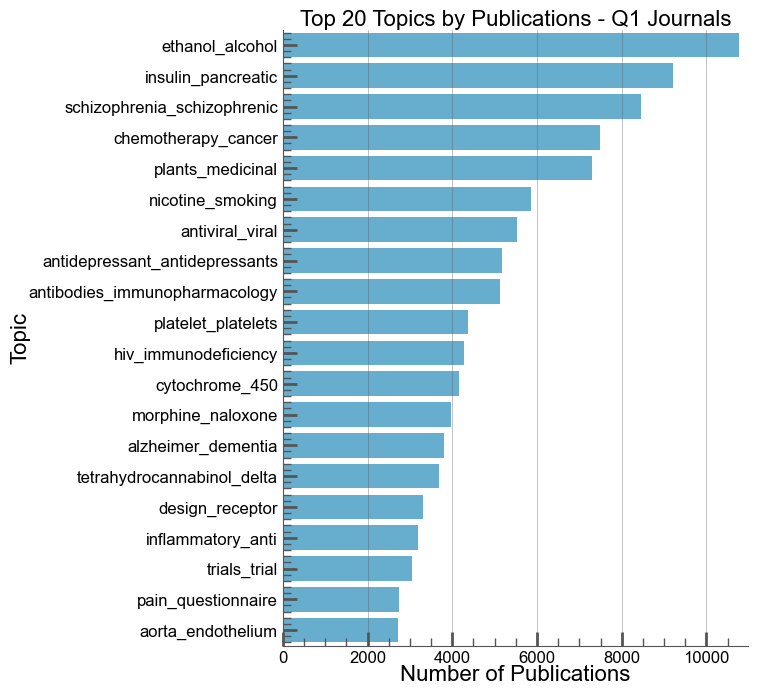

<Figure size 640x480 with 0 Axes>

In [12]:
group_topics_true = group_topics.filter(
    (pl.col("topic") != 0) &
    (pl.col("topic") != -1)
)
top20_publications = group_topics_true.sort("number_of_works", descending=True).head(20)

import aquarel as aq 

with aq.load_theme("scientific"):
    plt.figure(figsize=(6,8))
    sns.barplot(
        data=top20_publications,
        x="number_of_works",
        y="topic_name",
        orient="h"
    )
    plt.ylabel("Topic", fontsize=16)
    plt.xlabel("Number of Publications", fontsize=16)
    plt.title("Top 20 Topics by Publications - Q1 Journals", fontsize=16)
    plt.show()

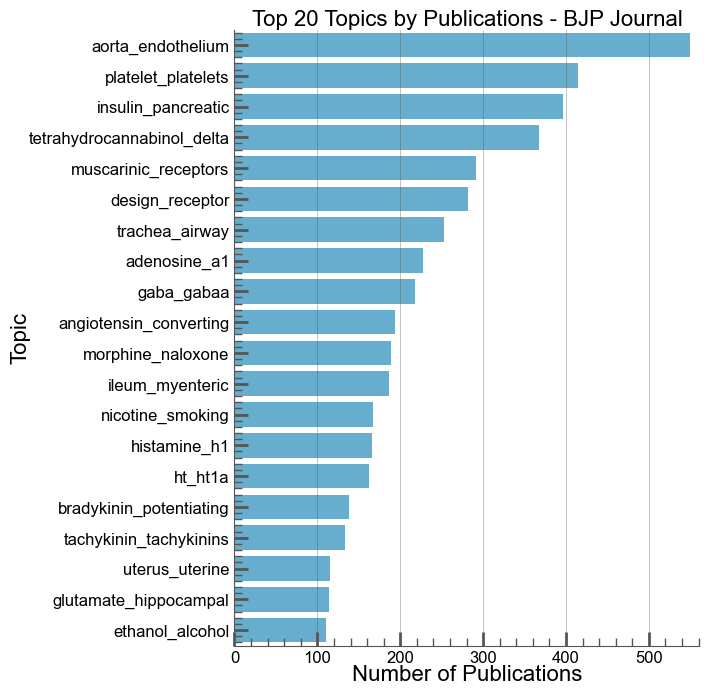

In [13]:
group_topics_bjp_true = group_topics_bjp.filter(
    (pl.col("topic") != 0) &
    (pl.col("topic") != -1)
)
top20_publications_bjp = group_topics_bjp_true.sort("number_of_works", descending=True).head(20)

with aq.load_theme("scientific"):
    plt.figure(figsize=(6,8))
    sns.barplot(
        data=top20_publications_bjp,
        x="number_of_works",
        y="topic_name",
        orient="h"
    )
    plt.ylabel("Topic", fontsize=16)
    plt.xlabel("Number of Publications", fontsize=16)
    plt.title("Top 20 Topics by Publications - BJP Journal", fontsize=16)
    plt.show()

<Figure size 640x480 with 0 Axes>

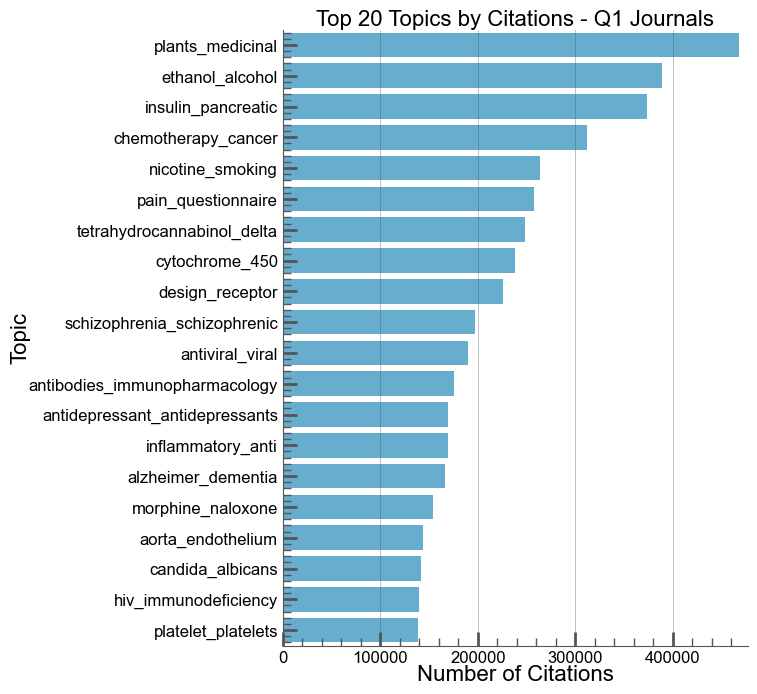

In [14]:

top20_citations = group_topics_true.sort("cited_by_count", descending=True).head(20)

with aq.load_theme("scientific"):
    plt.figure(figsize=(6,8))
    sns.barplot(
        data=top20_citations,
        x="cited_by_count",
        y="topic_name",
        orient="h"
    )
    plt.ylabel("Topic", fontsize=16)
    plt.xlabel("Number of Citations", fontsize=16)
    plt.title("Top 20 Topics by Citations - Q1 Journals", fontsize=16)
    plt.show()

<Figure size 640x480 with 0 Axes>

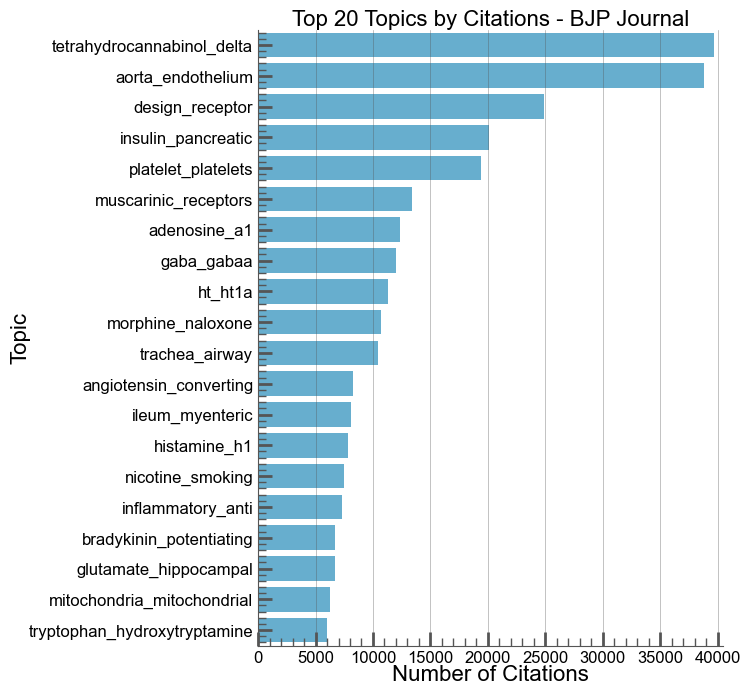

In [15]:

top20_citations_bjp = group_topics_bjp_true.sort("cited_by_count", descending=True).head(20)

with aq.load_theme("scientific"):
    plt.figure(figsize=(6,8))
    sns.barplot(
        data=top20_citations_bjp,
        x="cited_by_count",
        y="topic_name",
        orient="h"
    )
    plt.ylabel("Topic", fontsize=16)
    plt.xlabel("Number of Citations", fontsize=16)
    plt.title("Top 20 Topics by Citations - BJP Journal", fontsize=16)
    plt.show()

In [16]:
group_topics_true = group_topics_true.with_columns([
    pl.sum_horizontal([pl.col(f"cited_by_count_{y}") for y in range(2012, 2025)]).alias("cited_since_2012")
])
group_topics_bjp_true = group_topics_bjp_true.with_columns([
    pl.sum_horizontal([pl.col(f"cited_by_count_{y}") for y in range(2012, 2025)]).alias("cited_since_2012")
])

group_topics_true = group_topics_true.with_columns([
    pl.sum_horizontal([pl.col(f"number_of_works_{y}") for y in range(2012, 2025)]).alias("works_since_2012")
])

group_topics_bjp_true = group_topics_bjp_true.with_columns([
    pl.sum_horizontal([pl.col(f"number_of_works_{y}") for y in range(2012, 2025)]).alias("works_since_2012")
])

In [17]:
# Top 20 par publications
top20_publications2012 = group_topics_true.sort("works_since_2012", descending=True).head(20)
top20_publications2012_bjp = group_topics_bjp_true.sort("works_since_2012", descending=True).head(20)

top20_citations2012 = group_topics_true.sort("cited_since_2012", descending=True).head(20)
top20_citations2012_bjp = group_topics_bjp_true.sort("cited_since_2012", descending=True).head(20)



<Figure size 640x480 with 0 Axes>

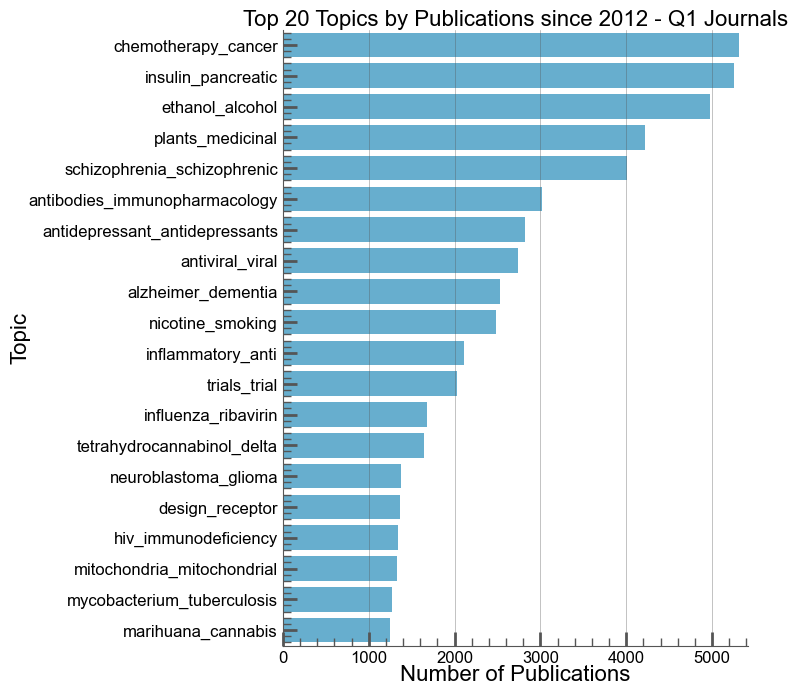

In [ ]:
with aq.load_theme("scientific"):
    plt.figure(figsize=(6,8))
    sns.barplot(
        data=top20_publications2012.to_pandas(),  
        x="works_since_2012",
        y="topic_name",
        orient="h"
    )
    plt.ylabel("Topic", fontsize=16)
    plt.xlabel("Number of Publications", fontsize=16)
    plt.title("Top 20 Topics by Publications since 2012 - Q1 Journals", fontsize=16)
    plt.show()

<Figure size 640x480 with 0 Axes>

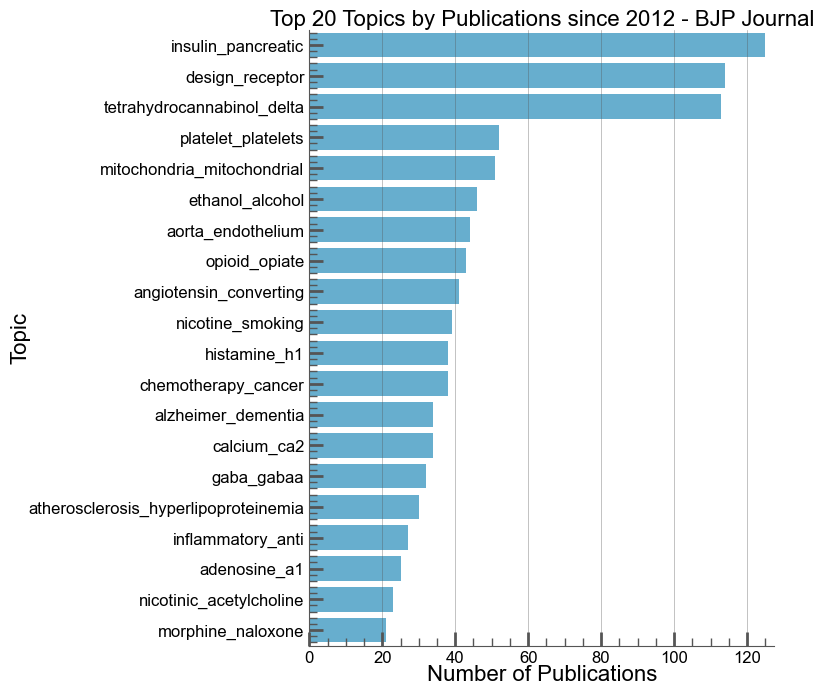

In [19]:
with aq.load_theme("scientific"):
    plt.figure(figsize=(6,8))
    sns.barplot(
        data=top20_publications2012_bjp.to_pandas(),  
        x="works_since_2012",
        y="topic_name",
        orient="h"
    )
    plt.ylabel("Topic", fontsize=16)
    plt.xlabel("Number of Publications", fontsize=16)
    plt.title("Top 20 Topics by Publications since 2012 - BJP Journal", fontsize=16)
    plt.show()

<Figure size 640x480 with 0 Axes>

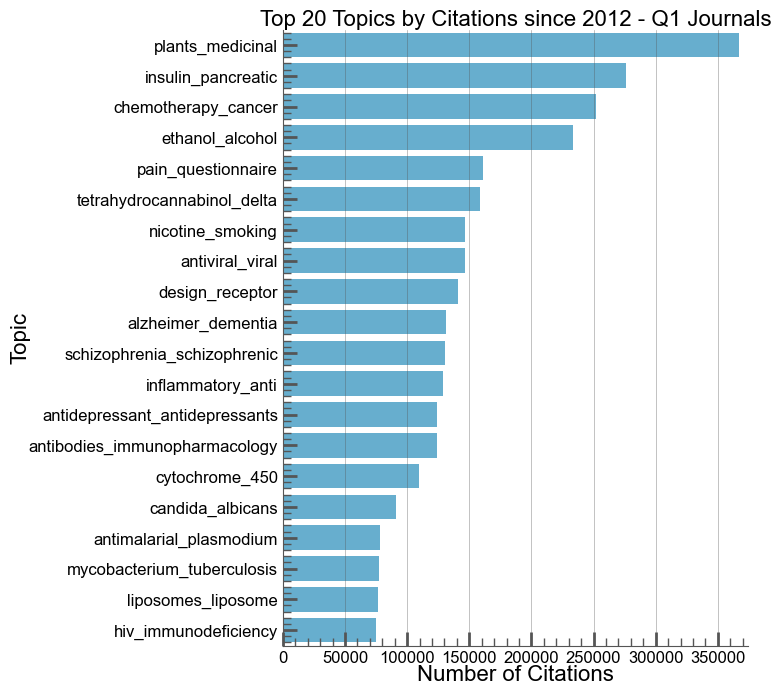

In [20]:
with aq.load_theme("scientific"):
    plt.figure(figsize=(6,8))
    sns.barplot(
        data=top20_citations2012.to_pandas(),  # Seaborn fonctionne avec Pandas
        x="cited_since_2012",
        y="topic_name",
        orient="h"
    )
    plt.ylabel("Topic", fontsize=16)
    plt.xlabel("Number of Citations", fontsize=16)
    plt.title("Top 20 Topics by Citations since 2012 - Q1 Journals", fontsize=16)
    plt.show()

<Figure size 640x480 with 0 Axes>

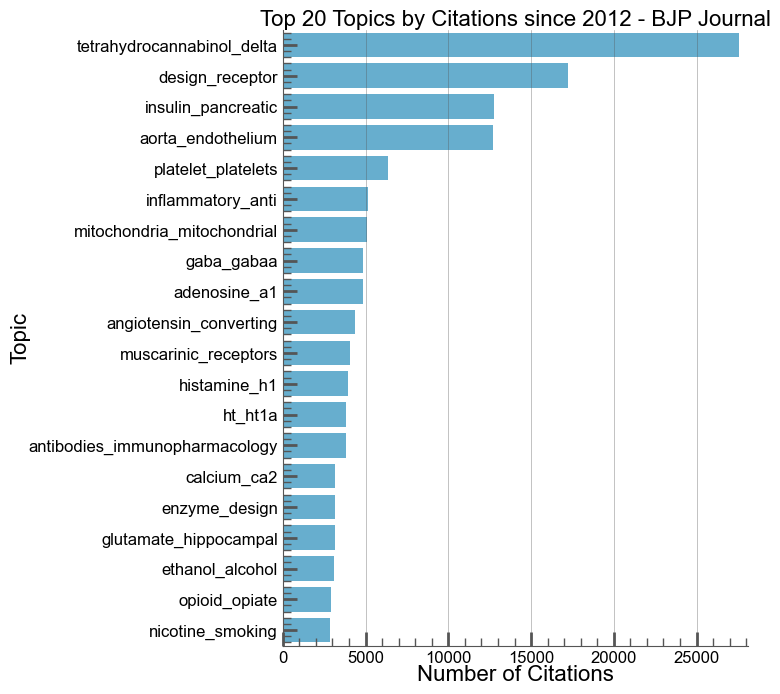

In [ ]:
with aq.load_theme("scientific"):
    plt.figure(figsize=(6,8))
    sns.barplot(
        data=top20_citations2012_bjp.to_pandas(), 
        x="cited_since_2012",
        y="topic_name",
        orient="h"
    )
    plt.ylabel("Topic", fontsize=16)
    plt.xlabel("Number of Citations", fontsize=16)
    plt.title("Top 20 Topics by Citations since 2012 - BJP Journal", fontsize=16)
    plt.show()

In [22]:
top20_citations2012

topic,mncs,number_of_works,cited_by_count,cited_by_count_2012,cited_by_count_2013,cited_by_count_2014,cited_by_count_2015,cited_by_count_2016,cited_by_count_2017,cited_by_count_2018,cited_by_count_2019,cited_by_count_2020,cited_by_count_2021,cited_by_count_2022,cited_by_count_2023,cited_by_count_2024,number_of_works_2018,number_of_works_2017,number_of_works_2023,number_of_works_2024,number_of_works_2012,number_of_works_2020,number_of_works_2016,number_of_works_2013,number_of_works_2019,number_of_works_2015,number_of_works_2014,number_of_works_2021,number_of_works_2022,topic_name,cited_since_2012,works_since_2012
i64,f64,i32,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,str,f64,i32
13,1.63533,7304,467708,17356.0,18823.0,20409.0,20213.0,18290.0,19685.0,20923.0,24550.0,33739.0,40318.0,42657.0,43839.0,45950.0,288,265,350,384,227,399,271,210,279,314,256,489,485,"""plants_medicinal""",366752.0,4217
4,1.111003,9202,373263,13310.0,14602.0,15679.0,15360.0,15444.0,15924.0,17554.0,19810.0,24333.0,27900.0,30990.0,32044.0,33437.0,430,393,498,532,284,505,321,257,387,300,269,557,522,"""insulin_pancreatic""",276387.0,5255
148,1.261323,7489,312291,8298.0,9660.0,10876.0,11798.0,12305.0,13732.0,14866.0,18208.0,24391.0,28658.0,30593.0,33354.0,35483.0,384,349,535,643,231,495,275,238,473,312,255,514,606,"""chemotherapy_cancer""",252222.0,5310
1,0.920594,10762,388705,13331.0,13879.0,15490.0,15277.0,15504.0,16157.0,16699.0,17982.0,22973.0,21776.0,21410.0,21940.0,20884.0,388,430,321,384,271,388,348,304,460,402,463,459,357,"""ethanol_alcohol""",233302.0,4975
6,2.2684,2734,257627,9552.0,10735.0,10835.0,10709.0,11386.0,10662.0,11592.0,12162.0,14044.0,15177.0,14599.0,14811.0,14407.0,75,80,86,123,74,80,75,75,104,69,46,111,79,"""pain_questionnaire""",160671.0,1077
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
100,1.412139,2299,141276,5193.0,5388.0,6544.0,5997.0,5956.0,6982.0,6705.0,7392.0,8341.0,8601.0,8135.0,8112.0,7754.0,120,99,55,47,67,74,82,85,82,89,80,84,56,"""candida_albicans""",91100.0,1020
64,1.140792,2475,116662,4813.0,4922.0,5312.0,5225.0,5109.0,5250.0,5084.0,5740.0,8214.0,7678.0,7265.0,6877.0,6598.0,98,73,72,89,88,111,95,79,67,98,102,115,81,"""antimalarial_plasmodium""",78087.0,1168
115,1.183514,2314,110028,4305.0,4114.0,4834.0,5098.0,4983.0,5906.0,5622.0,6321.0,7127.0,7334.0,6967.0,7576.0,7134.0,103,111,99,98,79,86,116,68,94,97,97,126,100,"""mycobacterium_tuberculosis""",77321.0,1274


In [23]:
top20_citations2012_bjp

topic,mncs,number_of_works,cited_by_count,cited_by_count_2012,cited_by_count_2013,cited_by_count_2014,cited_by_count_2015,cited_by_count_2016,cited_by_count_2017,cited_by_count_2018,cited_by_count_2019,cited_by_count_2020,cited_by_count_2021,cited_by_count_2022,cited_by_count_2023,cited_by_count_2024,number_of_works_2012,number_of_works_2017,number_of_works_2016,number_of_works_2020,number_of_works_2014,number_of_works_2021,number_of_works_2022,number_of_works_2023,number_of_works_2019,number_of_works_2018,number_of_works_2024,number_of_works_2013,number_of_works_2015,topic_name,cited_since_2012,works_since_2012
i64,f64,i32,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,str,f64,i32
11,2.213506,367,39689,1622.0,1553.0,1768.0,1792.0,1770.0,1908.0,1895.0,2153.0,2829.0,2985.0,2617.0,2444.0,2214.0,16,6,6,6,9,10,3,7,11,13,4,14,8,"""tetrahydrocannabinol_delta""",27550.0,113
49,2.185614,282,24898,911.0,1013.0,1154.0,1205.0,1257.0,1374.0,1346.0,1394.0,1467.0,1706.0,1471.0,1464.0,1461.0,13,7,8,8,16,5,3,10,7,4,7,17,9,"""design_receptor""",17223.0,114
4,1.205936,396,20086,704.0,775.0,830.0,838.0,853.0,913.0,945.0,1056.0,1151.0,1225.0,1251.0,1174.0,1056.0,10,13,13,12,11,10,3,2,7,8,11,16,9,"""insulin_pancreatic""",12771.0,125
19,1.764759,550,38788,1232.0,1177.0,1170.0,1148.0,948.0,922.0,902.0,880.0,957.0,905.0,919.0,789.0,774.0,2,6,3,3,4,4,5,3,2,2,3,4,3,"""aorta_endothelium""",12723.0,44
3,1.189106,415,19375,602.0,534.0,483.0,542.0,456.0,515.0,431.0,477.0,541.0,538.0,473.0,404.0,380.0,5,3,2,3,3,6,3,5,4,5,4,4,5,"""platelet_platelets""",6376.0,52
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
405,8.987619,10,3428,46.0,45.0,264.0,279.0,271.0,373.0,343.0,336.0,275.0,355.0,235.0,247.0,80.0,0,1,0,0,0,1,0,0,1,1,0,2,1,"""enzyme_design""",3149.0,7
102,1.344467,114,6697,302.0,249.0,249.0,284.0,218.0,232.0,219.0,201.0,221.0,270.0,234.0,230.0,237.0,3,0,1,2,0,3,1,1,0,1,2,2,3,"""glutamate_hippocampal""",3146.0,19
1,1.165784,110,5352,262.0,213.0,198.0,191.0,190.0,200.0,214.0,220.0,286.0,270.0,262.0,304.0,306.0,1,3,1,5,4,4,5,4,5,5,2,2,5,"""ethanol_alcohol""",3116.0,46


In [24]:
group_topics_test = top20_citations2012.filter(pl.col("topic").is_in([13, 1, 4, 6, 148]))
group_topics_test = group_topics_test.to_pandas()

years = list(range(2012, 2025))

for y in years:
    c = f"cited_by_count_{y}"
    if c in group_topics_test.columns:
        group_topics_test[c] = (group_topics_test[c] - group_topics_test[c].mean()) / group_topics_test[c].std()

    w = f"number_of_works_{y}"
    if w in group_topics_test.columns:
        group_topics_test[w] = (group_topics_test[w] - group_topics_test[w].mean()) / group_topics_test[w].std()

group_topics_test

,topic,mncs,number_of_works,cited_by_count,cited_by_count_2012,cited_by_count_2013,cited_by_count_2014,cited_by_count_2015,cited_by_count_2016,cited_by_count_2017,...,number_of_works_2016,number_of_works_2013,number_of_works_2019,number_of_works_2015,number_of_works_2014,number_of_works_2021,number_of_works_2022,topic_name,cited_since_2012,works_since_2012
0,13,1.635330,7304,467708,1.393938,1.464237,1.440871,1.487614,1.336171,1.338097,...,0.121205,-0.078753,-0.402449,0.277952,-0.012198,0.350558,0.365900,plants_medicinal,366752.0,4217
1,4,1.111003,9202,373263,0.262932,0.294388,0.255845,0.184851,0.309568,0.207941,...,0.587376,0.465567,0.303143,0.165486,0.075898,0.728937,0.545931,insulin_pancreatic,276387.0,5255
2,148,1.261323,7489,312291,-1.138106,-1.075285,-0.947469,-0.771349,-0.822725,-0.450740,...,0.158498,0.245523,0.865003,0.261885,-0.018975,0.489668,0.954649,chemotherapy_cancer,252222.0,5310
3,1,0.920594,10762,388705,0.268803,0.094009,0.208494,0.162570,0.331211,0.277956,...,0.839108,1.009886,0.780071,0.984880,1.390565,0.183625,-0.256909,ethanol_alcohol,233302.0,4975
4,6,2.268400,2734,257627,-0.787567,-0.777349,-0.957741,-1.063686,-1.154225,-1.373255,...,-1.706187,-1.642223,-1.545768,-1.690202,-1.435291,-1.752788,-1.609571,pain_questionnaire,160671.0,1077


<Figure size 640x480 with 0 Axes>

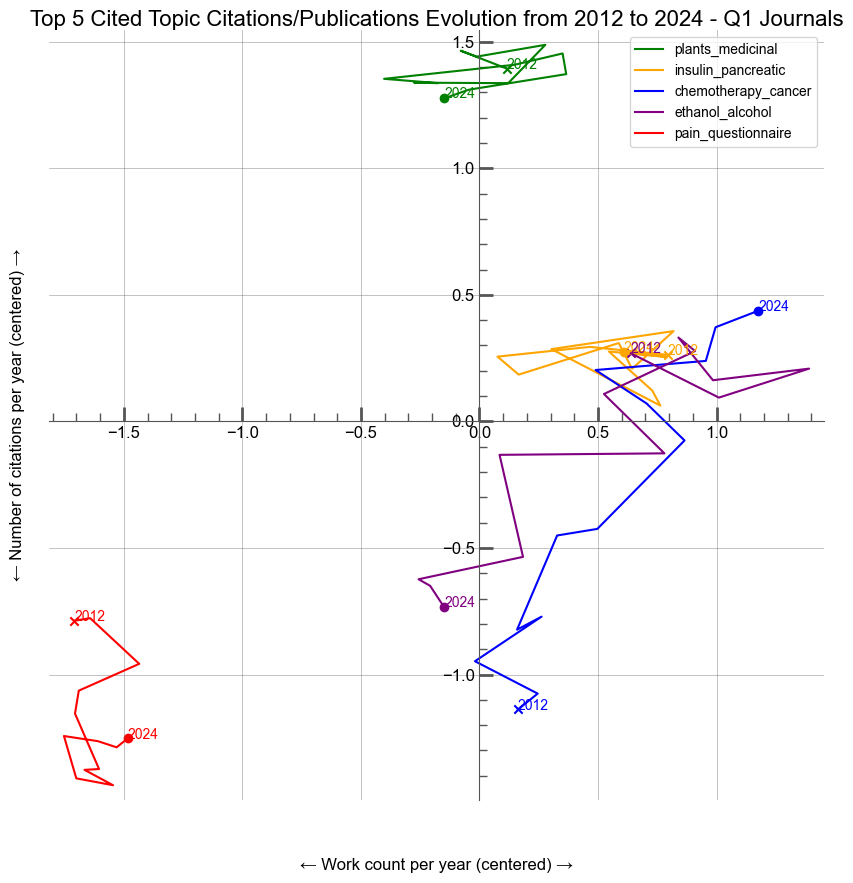

In [25]:
with aq.load_theme("scientific"):
    plt.figure(figsize=(10, 10))
    
    for index, row in group_topics_test.iterrows():
        if row["topic"] == 13:
            color="green"
        if row["topic"] == 4:
            color="orange"
        if row["topic"] == 148:
            color="blue"
        if row["topic"] == 6:
            color="red"
        if row["topic"] == 1:
            color="purple"

        x = [row[f"number_of_works_{i}"] for i in range(2012, 2025)]
        y = [row[f"cited_by_count_{i}"] for i in range(2012, 2025)]

        plt.plot(x, y, color=color, label=row["topic_name"])

        plt.scatter(
            row["number_of_works_2012"],
            row["cited_by_count_2012"],
            marker="x",
            color=color
        )
        plt.scatter(
            row["number_of_works_2024"],
            row["cited_by_count_2024"],
            color=color
        )

        plt.text(
            row["number_of_works_2012"],
            row["cited_by_count_2012"],
            "2012",
            color=color
        )
        plt.text(
            row["number_of_works_2024"],
            row["cited_by_count_2024"],
            "2024",
            color=color
        )

    plt.xlabel("← Work count per year (centered) →", labelpad=300) 
    plt.ylabel("← Number of citations per year (centered) →", labelpad=300)

    ax = plt.gca()
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')

    plt.legend()
    plt.title("Top 5 Cited Topic Citations/Publications Evolution from 2012 to 2024 - Q1 Journals", fontsize=16)
    plt.show()


In [26]:
group_topics_test_bjp = top20_citations2012_bjp.filter(pl.col("topic").is_in([11, 49, 4, 19, 3]))
group_topics_test_bjp = group_topics_test_bjp.to_pandas()

years = list(range(2012, 2025))

for y in years:
    c = f"cited_by_count_{y}"
    if c in group_topics_test_bjp.columns:
        group_topics_test_bjp[c] = (group_topics_test_bjp[c] - group_topics_test_bjp[c].mean()) / group_topics_test_bjp[c].std()

    w = f"number_of_works_{y}"
    if w in group_topics_test_bjp.columns:
        group_topics_test_bjp[w] = (group_topics_test_bjp[w] - group_topics_test_bjp[w].mean()) / group_topics_test_bjp[w].std()

group_topics_test_bjp

,topic,mncs,number_of_works,cited_by_count,cited_by_count_2012,cited_by_count_2013,cited_by_count_2014,cited_by_count_2015,cited_by_count_2016,cited_by_count_2017,...,number_of_works_2022,number_of_works_2023,number_of_works_2019,number_of_works_2018,number_of_works_2024,number_of_works_2013,number_of_works_2015,topic_name,cited_since_2012,works_since_2012
0,11,2.213506,367,39689,1.459565,1.395708,1.443660,1.471328,1.453494,1.468371,...,-0.447214,0.498542,1.403293,1.542831,-0.550276,0.462910,0.447214,tetrahydrocannabinol_delta,27550.0,113
1,49,2.185614,282,24898,-0.247823,0.006688,0.153402,0.214167,0.408005,0.465159,...,-0.447214,1.433307,0.233882,-0.561029,0.366851,0.925820,0.819892,design_receptor,17223.0,114
2,4,1.205936,396,20086,-0.744911,-0.605510,-0.527451,-0.571826,-0.415342,-0.400909,...,-0.447214,-1.059401,0.233882,0.374020,1.589686,0.771517,0.819892,insulin_pancreatic,12771.0,125
3,19,1.764759,550,38788,0.523023,0.428539,0.187024,0.092092,-0.221733,-0.384001,...,1.788854,-0.747812,-1.227881,-1.028554,-0.855985,-1.080123,-1.416176,aorta_endothelium,12723.0,44
4,3,1.189106,415,19375,-0.989853,-1.225425,-1.256635,-1.205761,-1.224424,-1.148621,...,-0.447214,-0.124635,-0.643176,-0.327267,-0.550276,-1.080123,-0.670820,platelet_platelets,6376.0,52


<Figure size 640x480 with 0 Axes>

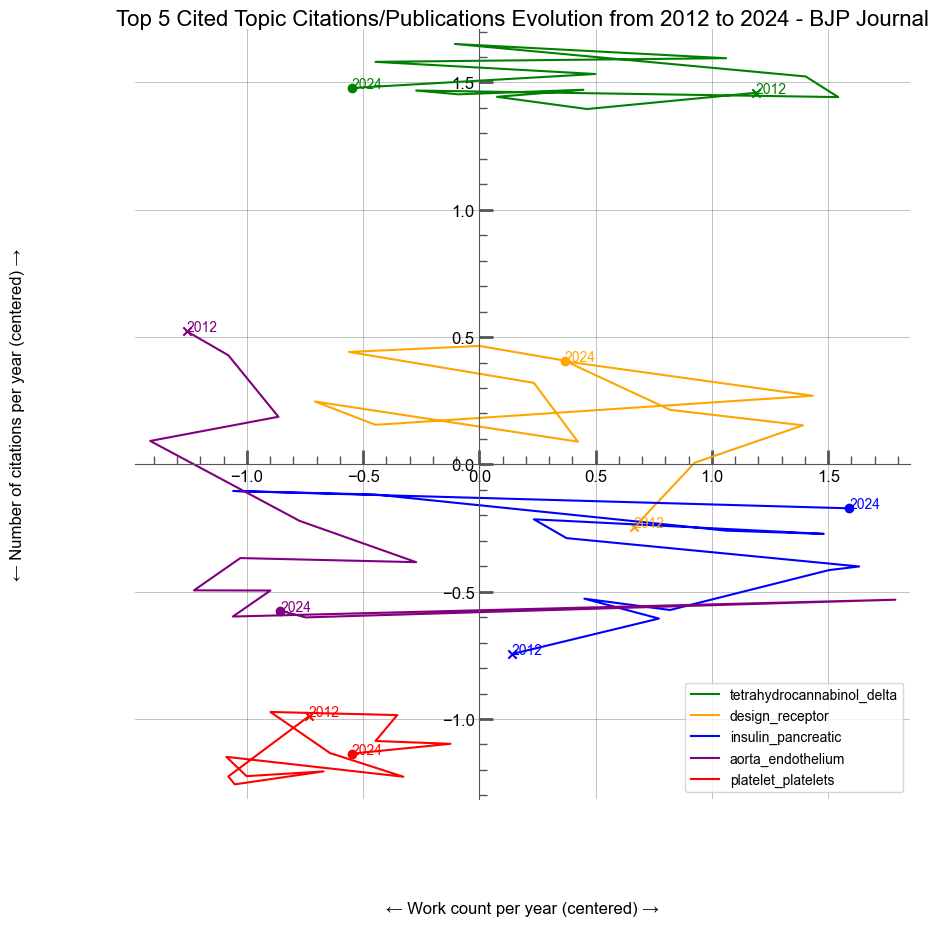

In [27]:
with aq.load_theme("scientific"):
    plt.figure(figsize=(10, 10))
    
    for index, row in group_topics_test_bjp.iterrows():
        if row["topic"] == 11:
            color="green"
        if row["topic"] == 49:
            color="orange"
        if row["topic"] == 4:
            color="blue"
        if row["topic"] == 19:
            color="purple"
        if row["topic"] == 3:
            color="red"

        x = [row[f"number_of_works_{i}"] for i in range(2012, 2025)]
        y = [row[f"cited_by_count_{i}"] for i in range(2012, 2025)]

        plt.plot(x, y, color=color, label=row["topic_name"])

        plt.scatter(
            row["number_of_works_2012"],
            row["cited_by_count_2012"],
            marker="x",
            color=color
        )
        plt.scatter(
            row["number_of_works_2024"],
            row["cited_by_count_2024"],
            color=color
        )

        plt.text(
            row["number_of_works_2012"],
            row["cited_by_count_2012"],
            "2012",
            color=color
        )
        plt.text(
            row["number_of_works_2024"],
            row["cited_by_count_2024"],
            "2024",
            color=color
        )

    plt.xlabel("← Work count per year (centered) →", labelpad=300) 
    plt.ylabel("← Number of citations per year (centered) →", labelpad=300)

    ax = plt.gca()
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')

    plt.legend()
    plt.title("Top 5 Cited Topic Citations/Publications Evolution from 2012 to 2024 - BJP Journal", fontsize=16)
    plt.show()


In [28]:
group_topics_pandas = group_topics.to_pandas()
group_topicsyears_pandas = group_topicsyears.to_pandas()
works_topics = works_topics.join(
    group_topics.select(["topic", "topic_name"]),
    on="topic",
    how="left"
)

In [29]:
group_topics_bjp_pandas = group_topics_bjp.to_pandas()
group_topicsyears_bjp_pandas = group_topicsyears_bjp.to_pandas()
works_topics_bjp = works_topics_bjp.join(
    group_topics_bjp.select(["topic", "topic_name"]),
    on="topic",
    how="left"
)



<Figure size 640x480 with 0 Axes>

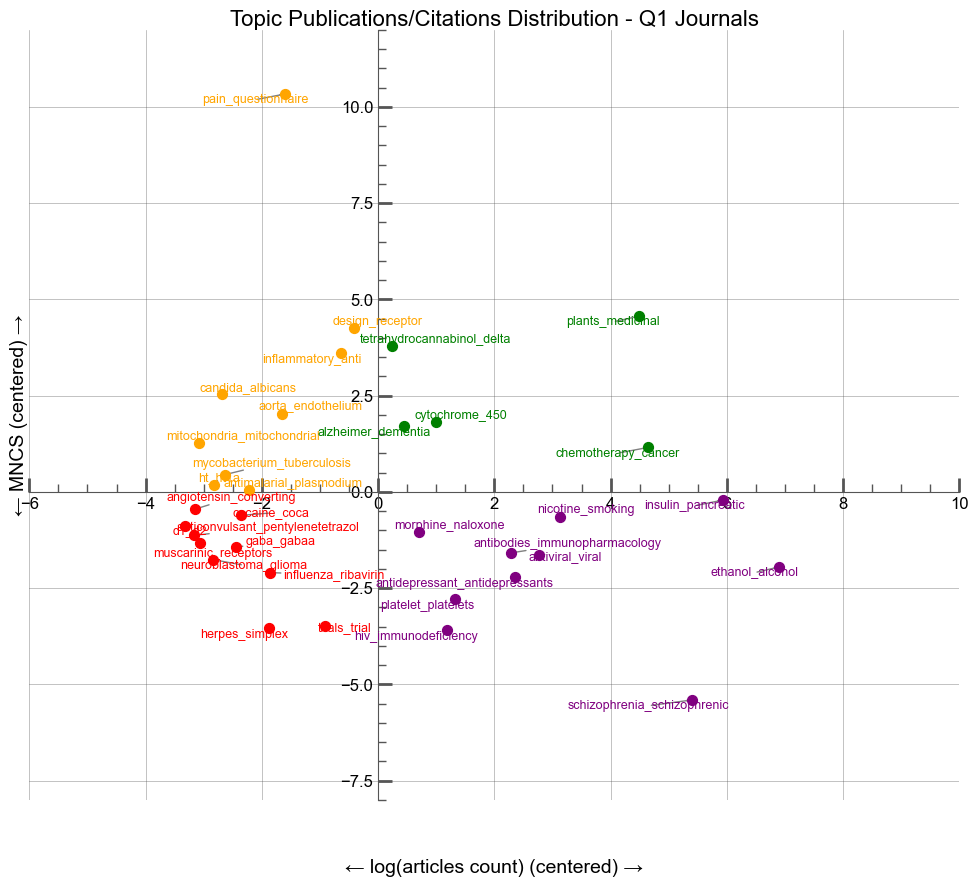

In [30]:
from adjustText import adjust_text

group_topics_viz = group_topics_pandas[
    (group_topics_pandas["topic"] != -1) &
    (group_topics_pandas["topic"] != 0) &
    (group_topics_pandas["number_of_works"] > 2000)
].copy()

group_topics_viz["mncs_viz"] = (
    (group_topics_viz["mncs"] - group_topics_viz["mncs"].mean())
    / group_topics_viz["mncs"].std() * 3
)

group_topics_viz["number_of_works_log"] = np.log(group_topics_viz["number_of_works"])
group_topics_viz["number_of_works_viz"] = (
    (group_topics_viz["number_of_works_log"] - group_topics_viz["number_of_works_log"].mean())
    / group_topics_viz["number_of_works_log"].std() * 3
)

with aq.load_theme("scientific"):
    plt.figure(figsize=(12, 10))

    texts = []  

    for _, row in group_topics_viz.iterrows():
        if row["number_of_works_viz"] >= 0 and row["mncs_viz"] >= 0:
            color = "green"
        elif row["number_of_works_viz"] >= 0 and row["mncs_viz"] < 0:
            color = "purple"
        elif row["number_of_works_viz"] < 0 and row["mncs_viz"] < 0:
            color = "red"
        else:
            color = "orange"

        plt.scatter(
            row["number_of_works_viz"],
            row["mncs_viz"],
            color=color,
            s=50,
            zorder=3
        )

        txt = plt.text(
            row["number_of_works_viz"],
            row["mncs_viz"],
            row["topic_name"],
            fontsize=9,
            color=color,
            ha='center',
            va='center'
        )

        texts.append(txt)  # 🔑

    adjust_text(
        texts,
        arrowprops=dict(arrowstyle="->", color="gray", alpha=1),
    )

    plt.xlim(-6, 10)
    plt.ylim(-8, 12)

    ax = plt.gca()
    ax.spines["left"].set_position("zero")
    ax.spines["bottom"].set_position("zero")
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)

    plt.xlabel("← log(articles count) (centered) →", fontsize=14, labelpad=250)
    plt.ylabel("← MNCS (centered) →", fontsize=14, labelpad=225)
    plt.title("Topic Publications/Citations Distribution - Q1 Journals", fontsize=16)

    plt.show()


<Figure size 640x480 with 0 Axes>

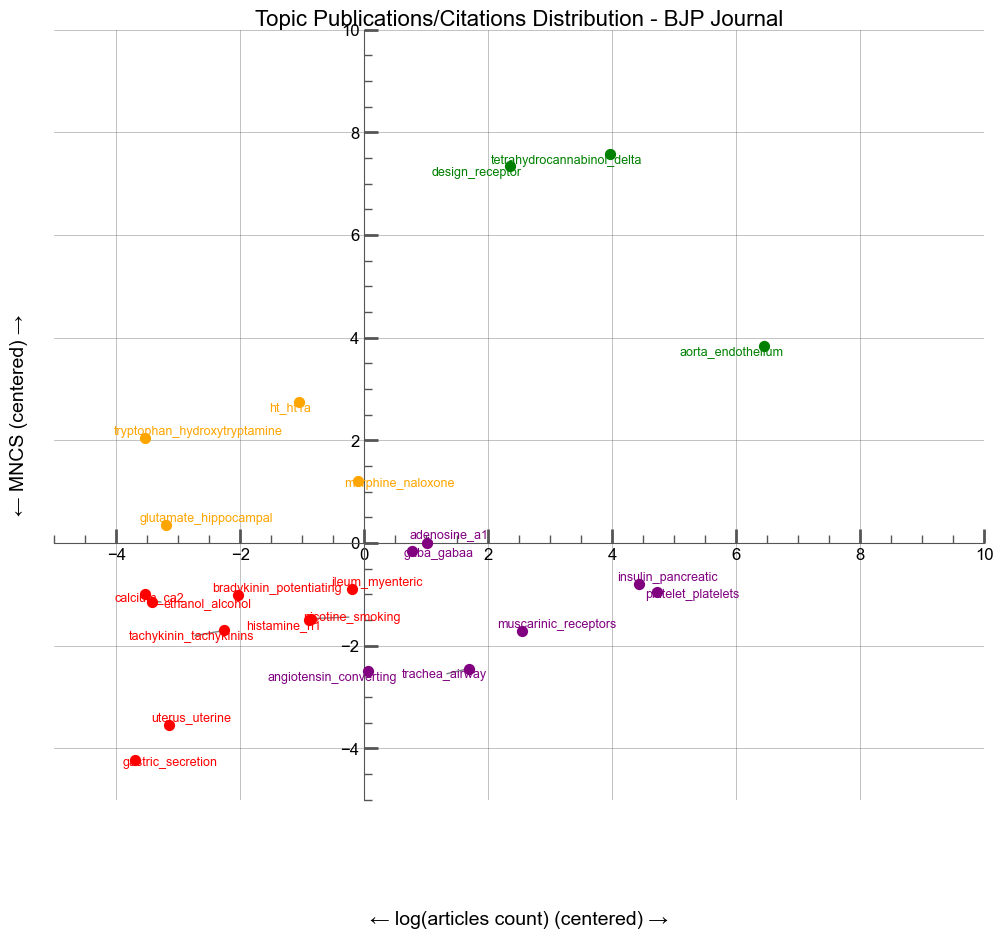

In [31]:
from adjustText import adjust_text

group_topics_viz = group_topics_bjp_pandas[
    (group_topics_bjp_pandas["topic"] != -1) &
    (group_topics_bjp_pandas["topic"] != 0) &
    (group_topics_bjp_pandas["number_of_works"] > 100)
].copy()

group_topics_viz["mncs_viz"] = (
    (group_topics_viz["mncs"] - group_topics_viz["mncs"].mean())
    / group_topics_viz["mncs"].std() * 3
)

group_topics_viz["number_of_works_log"] = np.log(group_topics_viz["number_of_works"])
group_topics_viz["number_of_works_viz"] = (
    (group_topics_viz["number_of_works_log"] - group_topics_viz["number_of_works_log"].mean())
    / group_topics_viz["number_of_works_log"].std() * 3
)

with aq.load_theme("scientific"):
    plt.figure(figsize=(12, 10))

    texts = []  

    for _, row in group_topics_viz.iterrows():
        if row["number_of_works_viz"] >= 0 and row["mncs_viz"] >= 0:
            color = "green"
        elif row["number_of_works_viz"] >= 0 and row["mncs_viz"] < 0:
            color = "purple"
        elif row["number_of_works_viz"] < 0 and row["mncs_viz"] < 0:
            color = "red"
        else:
            color = "orange"

        plt.scatter(
            row["number_of_works_viz"],
            row["mncs_viz"],
            color=color,
            s=50,
            zorder=3
        )

        txt = plt.text(
            row["number_of_works_viz"],
            row["mncs_viz"],
            row["topic_name"],
            fontsize=9,
            color=color,
            ha='center',
            va='center'
        )

        texts.append(txt)  # 🔑

    adjust_text(
        texts,
        arrowprops=dict(arrowstyle="->", color="gray", alpha=1),
    )

    plt.xlim(-5, 10)
    plt.ylim(-5, 10)

    ax = plt.gca()
    ax.spines["left"].set_position("zero")
    ax.spines["bottom"].set_position("zero")
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)

    plt.xlabel("← log(articles count) (centered) →", fontsize=14, labelpad=250)
    plt.ylabel("← MNCS (centered) →", fontsize=14, labelpad=225)
    plt.title("Topic Publications/Citations Distribution - BJP Journal", fontsize=16)

    plt.show()


In [32]:
works_topics = (
    works_topics
    .sort("year")
    .join(
        group_topicsyears.select(["topic", "year", "sum_cum_number_of_works", "mean_cum_mncs"]),
        on=["topic", "year"],
        how="left"
    )
    .rename({
        "sum_cum_number_of_works": "past_contributions_topic",
        "mean_cum_mncs": "mean_past_mncs_topic"
    })
)
works_topics_pandas = works_topics.to_pandas() 
works_topics_pandas

,title,year,primary_topic,abstract,cited_by_count,mncs,countries_distinct_count,institutions_distinct_count,referenced_works_count,authors_count,...,cited_by_count_2022,cited_by_count_2023,cited_by_count_2024,title_abstract,topic,number_of_works,age,topic_name,past_contributions_topic,mean_past_mncs_topic
0,on the pharmacological action of some phthalei...,1909,Chemistry and Stereochemistry Studies,,47,10.143885,1,1,0,2,...,NaN,NaN,1.0,on the pharmacological action of some phthalei...,-1,1,115,effects_adrenergic,0,1.000000
1,the antagonism of the adrenal glands against t...,1909,Hormonal Regulation and Hypertension,,15,3.237410,1,1,0,1,...,NaN,NaN,NaN,the antagonism of the adrenal glands against t...,4,1,115,insulin_pancreatic,0,1.000000
2,quantitative experiments with the cutaneous tu...,1909,Tuberculosis Research and Epidemiology,,14,3.021583,1,1,0,1,...,NaN,NaN,NaN,quantitative experiments with the cutaneous tu...,-1,1,115,effects_adrenergic,0,1.000000
3,the comparative toxicity of the chlorides of m...,1909,Pharmacological Effects and Toxicity Studies,,12,2.589928,1,1,0,2,...,NaN,NaN,NaN,the comparative toxicity of the chlorides of m...,-1,1,115,effects_adrenergic,0,1.000000
4,on the relation between the toxicity and chemi...,1909,Chemical Thermodynamics and Molecular Structure,,11,2.374101,1,1,0,2,...,NaN,NaN,NaN,on the relation between the toxicity and chemi...,-1,1,115,effects_adrenergic,0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689356,the addis declaration on immunization: assessi...,2024,HIV/AIDS Impact and Responses,,0,0.000000,1,1,13,13,...,NaN,NaN,NaN,the addis declaration on immunization: assessi...,217,1,0,antibodies_immunopharmacology,4752,0.013345
689357,mucosal immunization with an influenza vector ...,2024,Influenza Virus Research Studies,,0,0.000000,1,2,43,10,...,NaN,NaN,NaN,mucosal immunization with an influenza vector ...,152,1,0,influenza_ribavirin,2416,0.022696
689358,favorable nonclinical safety profile of rsvpre...,2024,Respiratory viral infections research,,0,0.000000,1,2,36,7,...,NaN,NaN,NaN,favorable nonclinical safety profile of rsvpre...,-1,1,0,effects_adrenergic,312702,0.000393
689359,anti-hbs positivity related to past hbv infect...,2024,Hepatitis B Virus Studies,,0,0.000000,1,3,35,7,...,NaN,NaN,NaN,anti-hbs positivity related to past hbv infect...,504,1,0,hepatitis_woodchuck,1654,0.021448


In [33]:

works_topics_bjp = (
    works_topics_bjp
    .sort("year")
    .join(
        group_topicsyears_bjp.select(["topic", "year", "sum_cum_number_of_works", "mean_cum_mncs"]),
        on=["topic", "year"],
        how="left"
    )
    .rename({
        "sum_cum_number_of_works": "past_contributions_topic",
        "mean_cum_mncs": "mean_past_mncs_topic"
    })
)
works_topics_bjp_pandas = works_topics_bjp.to_pandas() 
works_topics_bjp_pandas

,title,year,primary_topic,abstract,cited_by_count,mncs,countries_distinct_count,institutions_distinct_count,referenced_works_count,authors_count,...,cited_by_count_2022,cited_by_count_2023,cited_by_count_2024,title_abstract,topic,number_of_works,age,topic_name,past_contributions_topic,mean_past_mncs_topic
0,stimulus‐secretion coupling: the concept and c...,1968,Receptor Mechanisms and Signaling,,1402,39.499043,1,2,138,1,...,5.0,3.0,12.0,stimulus‐secretion coupling: the concept and c...,295,1,56,chromaffin_granules,0,1.000000
1,evidence for a central 5‐hydroxytryptamine rec...,1968,Psychedelics and Drug Studies,,276,7.775846,1,2,17,4,...,1.0,2.0,2.0,evidence for a central 5‐hydroxytryptamine rec...,-1,1,56,effects_adrenergic,0,1.000000
2,isolated 5‐hydroxytryptamine organelles of rab...,1968,Receptor Mechanisms and Signaling,,134,3.775229,1,1,13,2,...,NaN,NaN,NaN,isolated 5‐hydroxytryptamine organelles of rab...,3,1,56,platelet_platelets,0,1.000000
3,the actions of caerulein on the smooth muscle ...,1968,Neuropeptides and Animal Physiology,,131,3.690709,2,2,13,5,...,NaN,1.0,1.0,the actions of caerulein on the smooth muscle ...,-1,1,56,effects_adrenergic,0,1.000000
4,effects of prostaglandins e<sub>1</sub> and e<...,1968,Gastrointestinal motility and disorders,,130,3.662536,1,1,15,3,...,NaN,NaN,NaN,effects of prostaglandins e<sub>1</sub> and e<...,292,1,56,prostaglandin_prostaglandins,0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22303,dysregnet: patient‐specific and confounder‐awa...,2024,Bioinformatics and Genomic Networks,,0,0.000000,2,7,60,6,...,NaN,NaN,NaN,dysregnet: patient‐specific and confounder‐awa...,-1,1,0,effects_adrenergic,10911,0.006229
22304,antithrombotic but not anticoagulant activity ...,2024,interferon and immune responses,,0,0.000000,2,2,48,10,...,NaN,NaN,NaN,antithrombotic but not anticoagulant activity ...,514,1,0,anticoagulant_anticoagulants,4,0.591688
22305,loss of axin1 regulates response to lenvatinib...,2024,Cancer-related gene regulation,,0,0.000000,1,2,55,12,...,NaN,NaN,NaN,loss of axin1 regulates response to lenvatinib...,-1,1,0,effects_adrenergic,10911,0.006229
22306,inhibition of the upregulated phosphodiesteras...,2024,Phosphodiesterase function and regulation,,0,0.000000,2,8,66,12,...,NaN,NaN,NaN,inhibition of the upregulated phosphodiesteras...,226,1,0,phosphodiesterase_phosphodiesterases,47,0.877515


In [36]:
"""def gini(x):
    x = np.array(x)
    if x.size == 0:
        return np.nan
    x = np.sort(x)
    n = x.size
    cumx = np.cumsum(x)
    return (n + 1 - 2 * np.sum(cumx) / cumx[-1]) / n


df_plot = group_topics_pandas[
    (group_topics_pandas["topic"] != 0) &
    (group_topics_pandas["topic"] != -1) &
    (group_topics_pandas["number_of_works"] > 30)
]

with aq.load_theme("scientific"):
    plt.figure(figsize=(7.4, 6.8))
    sns.regplot(data=df_plot, x="number_of_works", y="gini")
    plt.xlabel("Size of the field (number of works)", fontsize=16)
    plt.ylabel("Gini coefficient of citation share", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.title("Gini coefficient vs. Size of the field - Q1 Journals", fontsize=18)
    plt.show()"""
    


'def gini(x):\n    x = np.array(x)\n    if x.size == 0:\n        return np.nan\n    x = np.sort(x)\n    n = x.size\n    cumx = np.cumsum(x)\n    return (n + 1 - 2 * np.sum(cumx) / cumx[-1]) / n\n\n\ndf_plot = group_topics_pandas[\n    (group_topics_pandas["topic"] != 0) &\n    (group_topics_pandas["topic"] != -1) &\n    (group_topics_pandas["number_of_works"] > 30)\n]\n\nwith aq.load_theme("scientific"):\n    plt.figure(figsize=(7.4, 6.8))\n    sns.regplot(data=df_plot, x="number_of_works", y="gini")\n    plt.xlabel("Size of the field (number of works)", fontsize=16)\n    plt.ylabel("Gini coefficient of citation share", fontsize=16)\n    plt.xticks(fontsize=16)\n    plt.yticks(fontsize=16)\n    plt.title("Gini coefficient vs. Size of the field - Q1 Journals", fontsize=18)\n    plt.show()'

In [37]:

"""df_plot = group_topics_bjp_pandas[
    (group_topics_bjp_pandas["topic"] != 0) &
    (group_topics_bjp_pandas["topic"] != -1) &
    (group_topics_bjp_pandas["number_of_works"] > 30)
]

with aq.load_theme("scientific"):
    plt.figure(figsize=(7.4, 6.8))
    sns.regplot(data=df_plot, x="number_of_works", y="gini")
    plt.xlabel("Size of the field (number of works)", fontsize=16)
    plt.ylabel("Gini coefficient of citation share", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.title("Gini coefficient vs. Size of the field - BJP Journal", fontsize=18)
    plt.show()"""
    


'df_plot = group_topics_bjp_pandas[\n    (group_topics_bjp_pandas["topic"] != 0) &\n    (group_topics_bjp_pandas["topic"] != -1) &\n    (group_topics_bjp_pandas["number_of_works"] > 30)\n]\n\nwith aq.load_theme("scientific"):\n    plt.figure(figsize=(7.4, 6.8))\n    sns.regplot(data=df_plot, x="number_of_works", y="gini")\n    plt.xlabel("Size of the field (number of works)", fontsize=16)\n    plt.ylabel("Gini coefficient of citation share", fontsize=16)\n    plt.xticks(fontsize=16)\n    plt.yticks(fontsize=16)\n    plt.title("Gini coefficient vs. Size of the field - BJP Journal", fontsize=18)\n    plt.show()'

In [38]:
import bar_chart_race as bcr

"""works_topics_classified = works_topics.filter(~pl.col("topic").is_in([-1, 0]))
group_topics_bcr = (
    works_topics_classified
    .select(["topic_name", "year", "mncs", "number_of_works", "cited_by_count", "topic"])
    .group_by(["topic_name", "year"])
    .agg(
        pl.col("number_of_works").sum().alias("number_of_works"),
        pl.col("cited_by_count").sum().alias("cited_by_count"),
        pl.col("topic")
    )
).fill_null(0)
smoothing = 5
group_topics_bcr_pandas = group_topics_bcr.to_pandas().dropna(subset=["topic_name"])
topics_pivot = group_topics_bcr_pandas.pivot(index = "year", columns = "topic_name", values = "number_of_works")
topics_pivot = topics_pivot.fillna(0)
topics_pivot_smooth = topics_pivot.copy()
for index, row in topics_pivot.iterrows():
    if index<1973:
        debut = 1968
    else:
        debut = index - smoothing
    topics_pivot_smooth.loc[index,:] = sum([topics_pivot.loc[i,:] for i in range(debut, index+1)])
    
topics_pivot_smooth = topics_pivot.sort_index()
topics_pivot_smooth.index = pd.to_datetime(topics_pivot.index, format ='%Y')
bcr.bar_chart_race(
    df=topics_pivot_smooth,
    filename='../results/q1/topics/bcr_new2_topics_nb5y.mp4',  # ou None pour afficher dans un notebook
    orientation='h',
    sort='desc',
    n_bars=5,
    fixed_order=False,
    fixed_max=True,
    steps_per_period=10,
    period_length=2000,
    period_fmt='%Y',
    title='Evolution of the top topics along the years (Number of works - 5-year period)',
    bar_size=.95,
    interpolate_period=True
)"""

'works_topics_classified = works_topics.filter(~pl.col("topic").is_in([-1, 0]))\ngroup_topics_bcr = (\n    works_topics_classified\n    .select(["topic_name", "year", "mncs", "number_of_works", "cited_by_count", "topic"])\n    .group_by(["topic_name", "year"])\n    .agg(\n        pl.col("number_of_works").sum().alias("number_of_works"),\n        pl.col("cited_by_count").sum().alias("cited_by_count"),\n        pl.col("topic")\n    )\n).fill_null(0)\nsmoothing = 5\ngroup_topics_bcr_pandas = group_topics_bcr.to_pandas().dropna(subset=["topic_name"])\ntopics_pivot = group_topics_bcr_pandas.pivot(index = "year", columns = "topic_name", values = "number_of_works")\ntopics_pivot = topics_pivot.fillna(0)\ntopics_pivot_smooth = topics_pivot.copy()\nfor index, row in topics_pivot.iterrows():\n    if index<1973:\n        debut = 1968\n    else:\n        debut = index - smoothing\n    topics_pivot_smooth.loc[index,:] = sum([topics_pivot.loc[i,:] for i in range(debut, index+1)])\n\ntopics_pivot_smo

In [39]:
"""works_topics_classified = works_topics.filter(~pl.col("topic").is_in([-1, 0]))

group_topics_bcr = (
    works_topics_classified
    .select(["topic_name", "year", "mncs", "number_of_works", "cited_by_count", "topic"])
    .group_by(["topic_name", "year"])
    .agg(
        pl.col("number_of_works").sum().alias("number_of_works"),
        pl.col("cited_by_count").sum().alias("cited_by_count"),
        pl.col("topic")
    )
).fill_null(0)

group_topics_bcr_pandas = group_topics_bcr.to_pandas().dropna(subset=["topic_name"])

topics_pivot = group_topics_bcr_pandas.pivot(index="year", columns="topic_name", values="number_of_works")
topics_pivot = topics_pivot.fillna(0).sort_index()

topics_pivot_cum = topics_pivot.cumsum()

topics_pivot_cum.index = pd.to_datetime(topics_pivot_cum.index, format='%Y')

bcr.bar_chart_race(
    df=topics_pivot_cum,
    filename='../results/q1/topics/bcr_new2_topics_nbcumul.mp4',  
    orientation='h',
    sort='desc',
    n_bars=5,
    fixed_order=False,
    fixed_max=True,
    steps_per_period=8,
    period_length=1500,
    period_fmt='%Y',
    title='Evolution of the top topics (Number of works - Cumulative)',
    bar_size=.95,
    interpolate_period=True
)"""

'works_topics_classified = works_topics.filter(~pl.col("topic").is_in([-1, 0]))\n\ngroup_topics_bcr = (\n    works_topics_classified\n    .select(["topic_name", "year", "mncs", "number_of_works", "cited_by_count", "topic"])\n    .group_by(["topic_name", "year"])\n    .agg(\n        pl.col("number_of_works").sum().alias("number_of_works"),\n        pl.col("cited_by_count").sum().alias("cited_by_count"),\n        pl.col("topic")\n    )\n).fill_null(0)\n\ngroup_topics_bcr_pandas = group_topics_bcr.to_pandas().dropna(subset=["topic_name"])\n\ntopics_pivot = group_topics_bcr_pandas.pivot(index="year", columns="topic_name", values="number_of_works")\ntopics_pivot = topics_pivot.fillna(0).sort_index()\n\ntopics_pivot_cum = topics_pivot.cumsum()\n\ntopics_pivot_cum.index = pd.to_datetime(topics_pivot_cum.index, format=\'%Y\')\n\nbcr.bar_chart_race(\n    df=topics_pivot_cum,\n    filename=\'../results/q1/topics/bcr_new2_topics_nbcumul.mp4\',  \n    orientation=\'h\',\n    sort=\'desc\',\n    n_

In [40]:
"""import bar_chart_race as bcr

works_topics_classified = works_topics.filter(~pl.col("topic").is_in([-1, 0]))
group_topics_bcr = (
    works_topics_classified
    .select(["topic_name", "year", "mncs", "number_of_works", "cited_by_count", "topic"])
    .group_by(["topic_name", "year"])
    .agg(
        pl.col("number_of_works").sum().alias("number_of_works"),
        pl.col("cited_by_count").sum().alias("cited_by_count"),
        pl.col("topic")
    )
).fill_null(0)
smoothing = 5
group_topics_bcr_pandas = group_topics_bcr.to_pandas().dropna(subset=["topic_name"])
topics_pivot = group_topics_bcr_pandas.pivot(index = "year", columns = "topic_name", values = "cited_by_count")
topics_pivot = topics_pivot.fillna(0)
topics_pivot_smooth = topics_pivot.copy()
for index, row in topics_pivot.iterrows():
    if index<1973:
        debut = 1968
    else:
        debut = index - smoothing
    topics_pivot_smooth.loc[index,:] = sum([topics_pivot.loc[i,:] for i in range(debut, index+1)])
    
topics_pivot_smooth = topics_pivot.sort_index()
topics_pivot_smooth.index = pd.to_datetime(topics_pivot.index, format ='%Y')
bcr.bar_chart_race(
    df=topics_pivot_smooth,
    filename='../results/q1/topics/bcr_new2_topics_citations5y.mp4',  
    orientation='h',
    sort='desc',
    n_bars=10,
    fixed_order=False,
    fixed_max=True,
    steps_per_period=8,
    period_length=1600,
    period_fmt='%Y',
    title='Evolution of the top topics along the years (Number of citations - 5-year period)',
    bar_size=.95,
    interpolate_period=True
)"""

'import bar_chart_race as bcr\n\nworks_topics_classified = works_topics.filter(~pl.col("topic").is_in([-1, 0]))\ngroup_topics_bcr = (\n    works_topics_classified\n    .select(["topic_name", "year", "mncs", "number_of_works", "cited_by_count", "topic"])\n    .group_by(["topic_name", "year"])\n    .agg(\n        pl.col("number_of_works").sum().alias("number_of_works"),\n        pl.col("cited_by_count").sum().alias("cited_by_count"),\n        pl.col("topic")\n    )\n).fill_null(0)\nsmoothing = 5\ngroup_topics_bcr_pandas = group_topics_bcr.to_pandas().dropna(subset=["topic_name"])\ntopics_pivot = group_topics_bcr_pandas.pivot(index = "year", columns = "topic_name", values = "cited_by_count")\ntopics_pivot = topics_pivot.fillna(0)\ntopics_pivot_smooth = topics_pivot.copy()\nfor index, row in topics_pivot.iterrows():\n    if index<1973:\n        debut = 1968\n    else:\n        debut = index - smoothing\n    topics_pivot_smooth.loc[index,:] = sum([topics_pivot.loc[i,:] for i in range(debut,

In [41]:
"""works_topics_classified = works_topics.filter(~pl.col("topic").is_in([-1, 0]))

group_topics_bcr = (
    works_topics_classified
    .select(["topic_name", "year", "mncs", "number_of_works", "cited_by_count", "topic"])
    .group_by(["topic_name", "year"])
    .agg(
        pl.col("number_of_works").sum().alias("number_of_works"),
        pl.col("cited_by_count").sum().alias("cited_by_count"),
        pl.col("topic")
    )
).fill_null(0)

group_topics_bcr_pandas = group_topics_bcr.to_pandas().dropna(subset=["topic_name"])

topics_pivot = group_topics_bcr_pandas.pivot(index="year", columns="topic_name", values="cited_by_count")
topics_pivot = topics_pivot.fillna(0).sort_index()

topics_pivot_cum = topics_pivot.cumsum()

topics_pivot_cum.index = pd.to_datetime(topics_pivot_cum.index, format='%Y')

bcr.bar_chart_race(
    df=topics_pivot_cum,
    filename='../results/q1/topics/bcr_new2_topics_citationscumul.mp4',  
    orientation='h',
    sort='desc',
    n_bars=5,
    fixed_order=False,
    fixed_max=True,
    steps_per_period=6,
    period_length=1200,
    period_fmt='%Y',
    title='Evolution of the top topics (Number of citations - Cumulative)',
    bar_size=.95,
    interpolate_period=True
)"""

'works_topics_classified = works_topics.filter(~pl.col("topic").is_in([-1, 0]))\n\ngroup_topics_bcr = (\n    works_topics_classified\n    .select(["topic_name", "year", "mncs", "number_of_works", "cited_by_count", "topic"])\n    .group_by(["topic_name", "year"])\n    .agg(\n        pl.col("number_of_works").sum().alias("number_of_works"),\n        pl.col("cited_by_count").sum().alias("cited_by_count"),\n        pl.col("topic")\n    )\n).fill_null(0)\n\ngroup_topics_bcr_pandas = group_topics_bcr.to_pandas().dropna(subset=["topic_name"])\n\ntopics_pivot = group_topics_bcr_pandas.pivot(index="year", columns="topic_name", values="cited_by_count")\ntopics_pivot = topics_pivot.fillna(0).sort_index()\n\ntopics_pivot_cum = topics_pivot.cumsum()\n\ntopics_pivot_cum.index = pd.to_datetime(topics_pivot_cum.index, format=\'%Y\')\n\nbcr.bar_chart_race(\n    df=topics_pivot_cum,\n    filename=\'../results/q1/topics/bcr_new2_topics_citationscumul.mp4\',  \n    orientation=\'h\',\n    sort=\'desc\',\n

In [42]:
group_topics_test = group_topics_pandas[~group_topics_pandas["topic"].isin([-1,0])] 
years = list(range(2012, 2025))

for i in range(1, len(years)):
    y_prev, y_curr = years[i-1], years[i]
    col_prev = f"cited_by_count_{y_prev}"
    col_curr = f"cited_by_count_{y_curr}"
    new_col = f"delta_cited_by_count_{y_curr}"
    group_topics_test[new_col] = group_topics_test[col_curr] - group_topics_test[col_prev]

for i in range(1, len(years)):
    y_prev, y_curr = years[i-1], years[i]
    col_prev = f"number_of_works_{y_prev}"
    col_curr = f"number_of_works_{y_curr}"
    new_col = f"delta_number_of_works_{y_curr}"
    group_topics_test[new_col] = group_topics_test[col_curr] - group_topics_test[col_prev]

C:\Users\noahr\AppData\Local\Temp\ipykernel_8616\3864279943.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_topics_test[new_col] = group_topics_test[col_curr] - group_topics_test[col_prev]
C:\Users\noahr\AppData\Local\Temp\ipykernel_8616\3864279943.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_topics_test[new_col] = group_topics_test[col_curr] - group_topics_test[col_prev]
C:\Users\noahr\AppData\Local\Temp\ipykernel_8616\3864279943.py:9: SettingWithCopyWarning: 
A value is trying to be

In [43]:
years = list(range(2012, 2025))
pairs = []

for y in years[1:-1]:  
    cited_col = f"delta_cited_by_count_{y}"
    works_col = f"delta_number_of_works_{y+1}"
    temp = group_topics_test[[cited_col, works_col]].copy()
    temp = temp.rename(columns={
        cited_col: "delta_cited",
        works_col: "delta_works_next"
    })
    temp["year"] = y
    pairs.append(temp)

df_corr = pd.concat(pairs, ignore_index=True)

corr = df_corr[["delta_cited", "delta_works_next"]].corr().iloc[0,1]
print("Global Correlation :", corr)

Global Correlation : 0.1461128638627133


In [44]:
works_modelling = works_topics.select([
    "year",
    "age",
    "mncs",
    "topic_name",
    "primary_topic",
    "countries_distinct_count",
    "institutions_distinct_count",
    "referenced_works_count",
    "authors_count",
    "review",
    "meta_analysis",
    "mean_past_contributions_authors",
    "mean_past_mncs_authors",
    "mean_past_contributions_institutions",
    "mean_past_mncs_institutions",
    "past_contributions_topic",
    "mean_past_mncs_topic",
])
works_modelling.write_parquet("../data/modelling/works_modelling2.parquet")

In [45]:



works_topics = works_topics.with_columns(
    ((pl.col("year") // 10) * 10).alias("decade")
)

works_topics = works_topics.filter(pl.col("decade").is_between(1900, 2029))

decades = works_topics.select("decade").unique().to_series().sort().to_list()

dfs_by_decade = {
    decade: works_topics.filter(pl.col("decade") == decade)
    for decade in decades
}

for decade, df in dfs_by_decade.items():
    print(f"{decade}s : {df.height} works")

dfs_by_decade

for decade, df in dfs_by_decade.items():
    df.write_parquet(f"../data/modelling/works_modelling2_{decade}s.parquet")

1900s : 30 works
1910s : 658 works
1920s : 1061 works
1930s : 1555 works
1940s : 1869 works
1950s : 2385 works
1960s : 9333 works
1970s : 28769 works
1980s : 60618 works
1990s : 100865 works
2000s : 152114 works
2010s : 194754 works
2020s : 135350 works


In [46]:
citation_cols = [c for c in works_topics_bjp.columns if c.startswith("cited_by_count")]

works_prediction = works_topics_bjp.select(
    [   "title",
        "year",
        "age",
        "mncs",
        "topic_name",
        "primary_topic",
        "countries_distinct_count",
        "institutions_distinct_count",
        "referenced_works_count",
        "authors_count",
        "review",
        "meta_analysis",
        "mean_past_contributions_authors",
        "mean_past_mncs_authors",
        "mean_past_contributions_institutions",
        "mean_past_mncs_institutions",
        "past_contributions_topic",
        "mean_past_mncs_topic",
        *citation_cols  
    ]
)

works_prediction.write_parquet("../data/modelling/works_prediction.parquet")